## Employee Data Analysis Project
#### Submitted By : Elizabeth Raju

#### Module 2: End Project

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_excel("ABC Company.xlsx")

In [3]:
# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  
0     180              Texas  7730337.0  
1     235          Marquette  6796117.0  
2     205  Boston University        NaN  
3     185      Georgia State  1148640.0  
4     231                NaN  5000000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number  

Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [4]:
# Replace height values with random numbers between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))
print(df['Height'].describe())

count    458.000000
mean     165.362445
std        9.123974
min      150.000000
25%      157.000000
50%      165.500000
75%      173.000000
max      180.000000
Name: Height, dtype: float64


TASK 1: Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.


                       Employees  Percentage
Team                                        
New Orleans Pelicans          19        4.15
Memphis Grizzlies             18        3.93
Utah Jazz                     16        3.49
Milwaukee Bucks               16        3.49
New York Knicks               16        3.49
Boston Celtics                15        3.28
Los Angeles Clippers          15        3.28
Los Angeles Lakers            15        3.28
Phoenix Suns                  15        3.28
Sacramento Kings              15        3.28
Brooklyn Nets                 15        3.28
Philadelphia 76ers            15        3.28
Toronto Raptors               15        3.28
Golden State Warriors         15        3.28
Indiana Pacers                15        3.28
Detroit Pistons               15        3.28
Cleveland Cavaliers           15        3.28
Chicago Bulls                 15        3.28
Houston Rockets               15        3.28
San Antonio Spurs             15        3.28


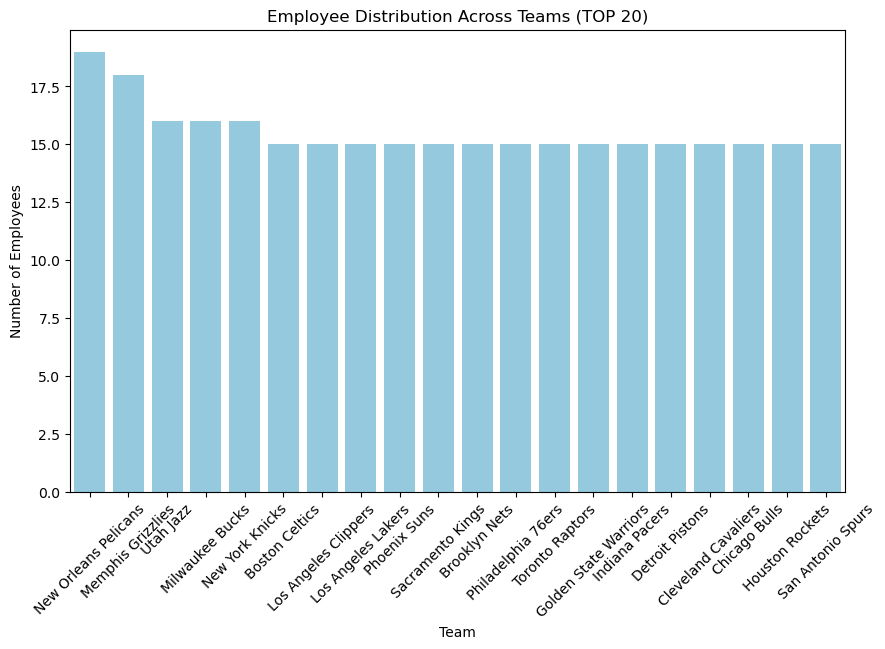

The largest team is New Orleans Pelicans with 4.15 % of employees.


In [12]:
#Employee distribution across teams
team_counts = df['Team'].value_counts()
team_percent = round((team_counts / len(df)) * 100, 2)

team_distribution = pd.DataFrame({'Employees': team_counts,'Percentage': team_percent})
print(team_distribution[:20])

plt.figure(figsize=(10,6))
sns.barplot(x="Team", y="Employees",data=team_distribution[:20],color='skyblue')
plt.title('Employee Distribution Across Teams (TOP 20)')
plt.ylabel('Number of Employees')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()

largest_team = team_counts.idxmax()
largest_team_pct = team_percent[largest_team]
print(f"The largest team is {largest_team} with {largest_team_pct} % of employees.")


TASK 2: Segregate employees based on their positions within the company.

  Position  Employees
0       SG        102
1       PF        100
2       PG         92
3       SF         85
4        C         79


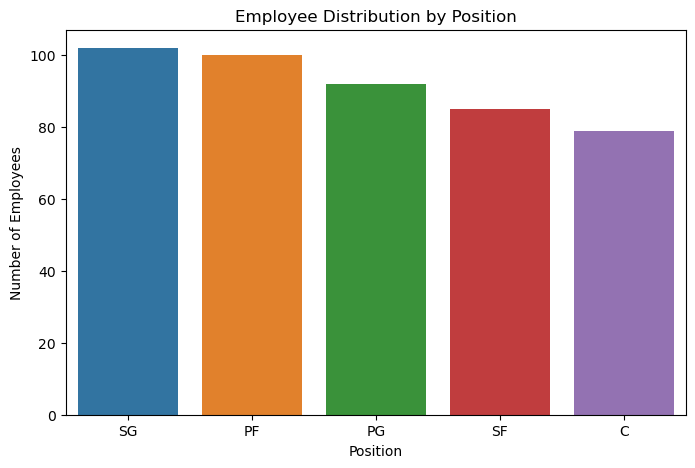

Most employees are in the SG position with employee count 102.


In [6]:
#Segregate employees by positions
position_counts = df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Employees']

print(position_counts)

plt.figure(figsize=(8,5))
sns.barplot(x="Position", y="Employees", data=position_counts,hue="Position")
plt.title('Employee Distribution by Position')
plt.ylabel('Number of Employees')
plt.xlabel('Position')
plt.show()


predominant_position = df['Position'].value_counts().idxmax()
position_count_max = df['Position'].value_counts().max()
print(f"Most employees are in the {predominant_position} position with employee count {position_count_max}.")


TASK 3: Identify the predominant age group among employees.

AgeGroup
<25      154
25-35    272
35-45     32
45+        0
Name: count, dtype: int64


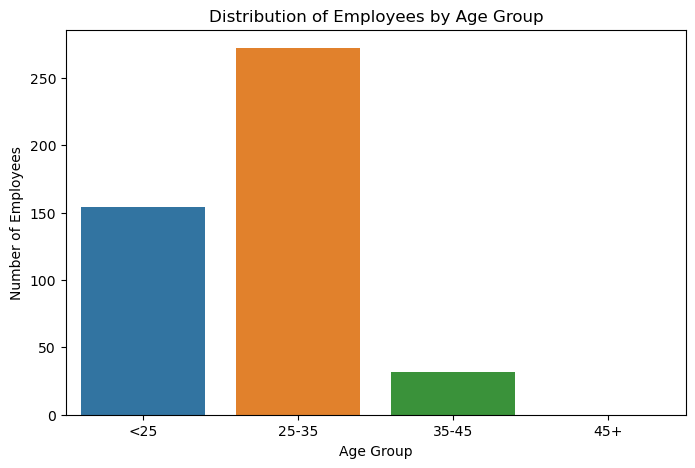

Most employees are in the 25-35 age group.


In [9]:
# Predominant age group
age_bins = [18, 25, 35, 45, 60]
age_labels = ["<25", "25-35", "35-45", "45+"]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['AgeGroup'].value_counts().reindex(age_labels)

print(age_group_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=age_group_counts.index,y=age_group_counts.values,hue=age_group_counts.index)


plt.title("Distribution of Employees by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()

predominant_age_group = age_group_counts.idxmax()
print(f"Most employees are in the {predominant_age_group} age group.")


TASK 4: Discover which team and position have the highest salary expenditure.

Highest Salary Expenditure by Team:
Cleveland Cavaliers  with value 106988689.0

Highest Salary Expenditure by Position:
C with value 466377332.0


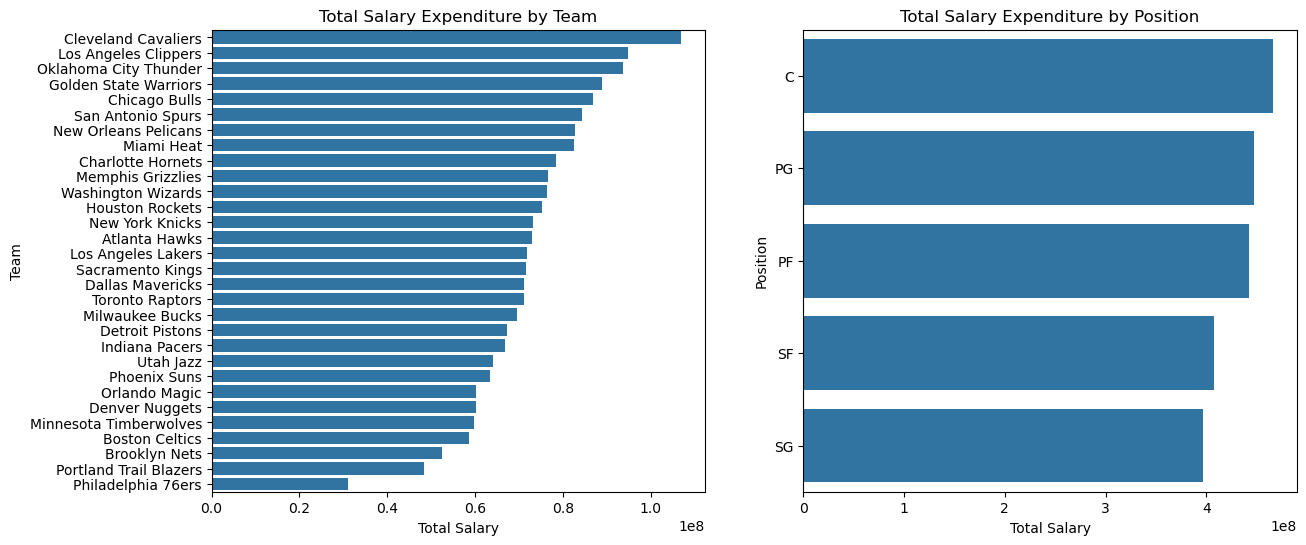

The highest salary expenditure is from team 'Los Angeles Lakers' and position 'SF', totaling 31,866,445.00.


In [10]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
top_team = team_salary.idxmax()
top_team_value = team_salary.max()

print("Highest Salary Expenditure by Team:")
print(f"{top_team}  with value {top_team_value}")


position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

top_position = position_salary.idxmax()
top_position_value = position_salary.max()

print("\nHighest Salary Expenditure by Position:")
print(f"{top_position} with value {top_position_value}")

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x=team_salary.values, y=team_salary.index, ax=axes[0])
axes[0].set_title("Total Salary Expenditure by Team")
axes[0].set_xlabel("Total Salary")
axes[0].set_ylabel("Team")

sns.barplot(x=position_salary.values, y=position_salary.index, ax=axes[1])
axes[1].set_title("Total Salary Expenditure by Position")
axes[1].set_xlabel("Total Salary")
axes[1].set_ylabel("Position")
plt.show()

team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum()
highest_salary_team_position = team_position_salary.idxmax()
highest_salary_amount = team_position_salary.max()
print(f"The highest salary expenditure is from team '{highest_salary_team_position[0]}' "
      f"and position '{highest_salary_team_position[1]}', totaling {highest_salary_amount:,.2f}.")


TASK 5: Investigate if there's any correlation between age and salary, and represent it visually

Correlation between Age and Salary: 0.21 (positive)


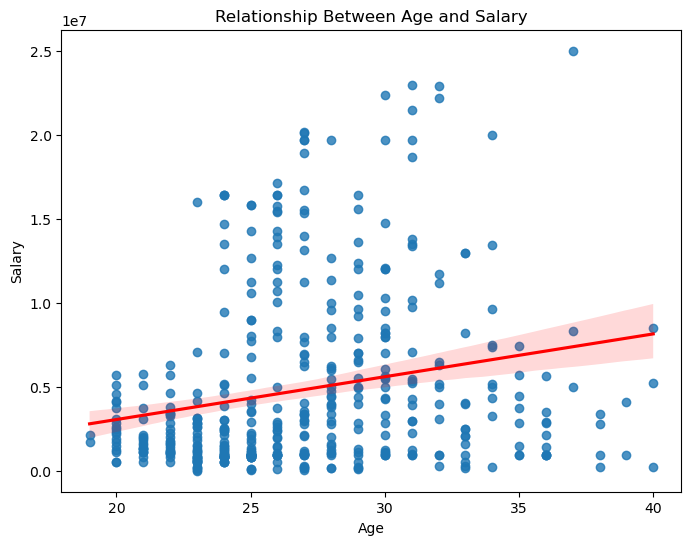

In [11]:
# Correlation between Age and Salary
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f} ({'positive' if correlation>0 else 'negative'})")

plt.figure(figsize=(8,6))
sns.regplot(x='Age', y='Salary', data=df, line_kws={'color':'red'})
plt.title("Relationship Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()
